In [50]:
# Importing the required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering as AGC

### Basic Exploratory Data Analysis

In the following cells, we just have a small look at all the basic configurations of our data. 

In [51]:
# Loading and describing dataset

df = pd.read_csv("HR_comma_sep.csv")
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [52]:
# Having a look at how the values are framed

df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [53]:
# Shape

df.shape

(14999, 10)

In [54]:
# Dataypes used

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [55]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

We can clearly see how there are no tuples with null values

In [56]:
# Renaming the column with title 'sales' to 'dept'

df.rename(columns={'sales': 'dept'}, inplace = True)

### Advanced Exploration

We will now make some graphs to gain a deeper understanding of our dataset.

<AxesSubplot: xlabel='left', ylabel='count'>

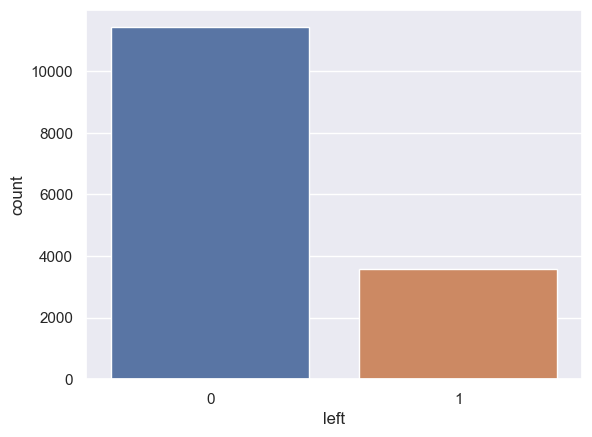

In [57]:
#Count of how many people left

sns.countplot(x='left', data=df)

<AxesSubplot: xlabel='number_project', ylabel='left'>

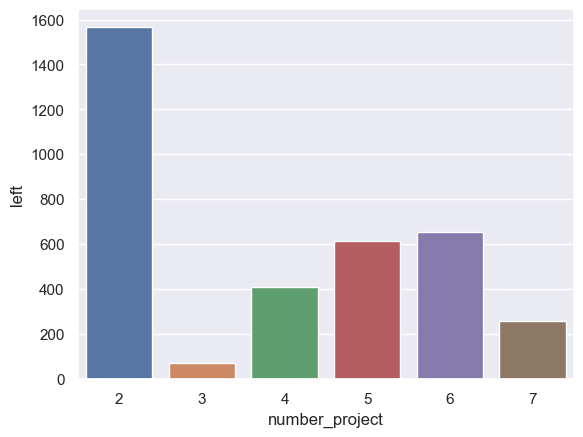

In [58]:
# Number of projects done by people who left

dfleft = df.groupby('number_project')['left'].sum().reset_index(name='left');
sns.barplot(x='number_project',y='left', data=dfleft)

<AxesSubplot: xlabel='time_spend_company', ylabel='count'>

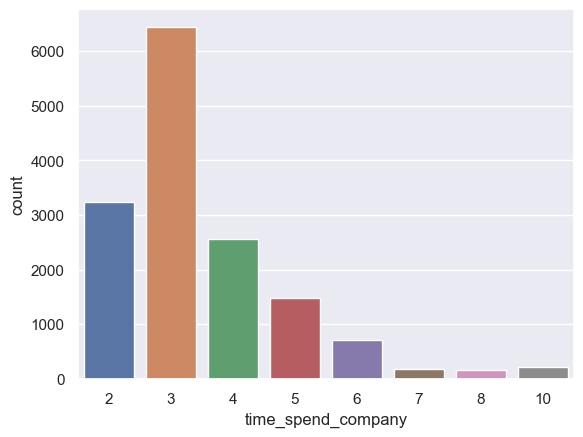

In [59]:
# Time spent by employees

sns.countplot(x='time_spend_company', data=df)

<AxesSubplot: xlabel='dept', ylabel='count'>

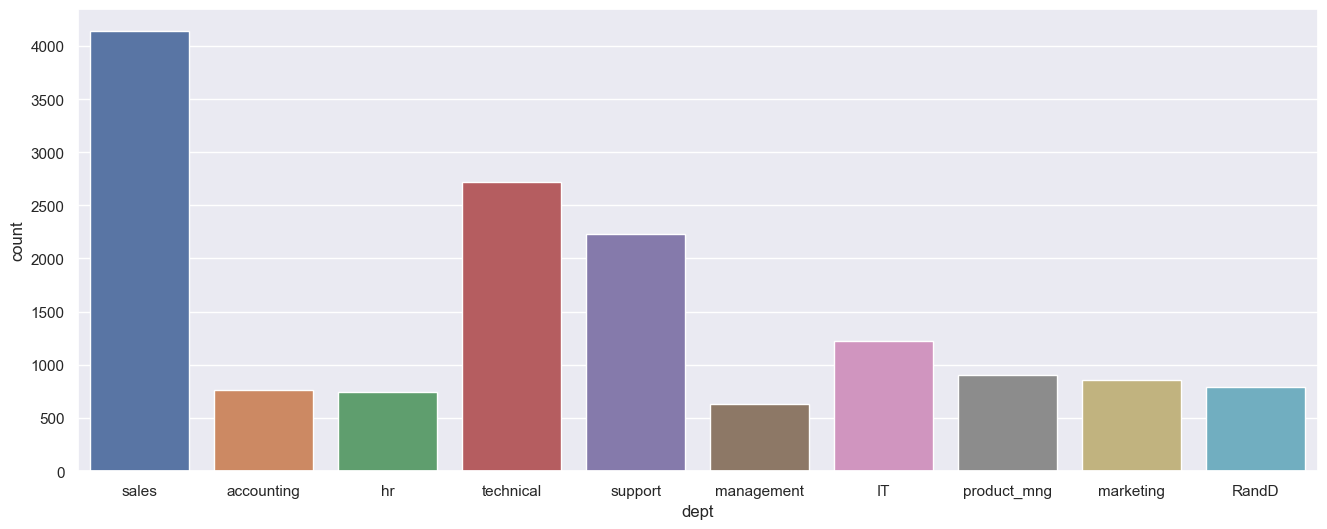

In [60]:
# Number of employees in every department

plt.figure(figsize=(16,6))
sns.countplot(x='dept', data=df)

### Further Analysis, Wrangling and Preprocessing

Here, we will make some important changes to the data to get a better understanding of it.

In [61]:
# Converting 'salary' variable types to numeric

df['salary'] = df['salary'].map({'low':1, 'medium':2, 'high':3})

In [62]:
# Count of each salary type

df['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

In [63]:
# Count of each salary type in every department

tab1 = df.pivot_table(values="satisfaction_level", index="dept", columns="salary", aggfunc=np.count_nonzero)
tab1

salary,1,2,3
dept,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


In [64]:
# Checking correlation between the columns

corr = df.corr()
corr

C:\Users\rishi\AppData\Local\Temp\ipykernel_18548\662265518.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


###### Comments
-  Negative correlation of (-0.39) between satisfaction_level and the employees that left the company.
-  The highest positive correlation is between number of projects and average monthly hours (0.42).
-  Last_evaluation is high correlated to number_project(0.35)and average_monthly_hours(0.34).
-  Work_accident have a low negative correlation(-0.15)and salary (-0.16) with employees that left.


### Hypothesis Testing

Now we shall make assumptions and test them.

##### First Hypothesis

We shall assume salary is the reason people left the company.

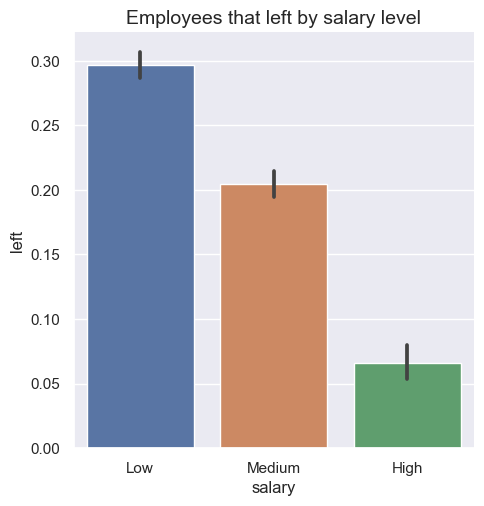

In [65]:
# Visualizing the relation between salary and employees leaving

diag = sns.catplot(x='salary', y='left', kind = 'bar', data = df)
plt.title('Employees that left by salary level', fontsize=14)
diag.set_xticklabels(['Low','Medium','High'])

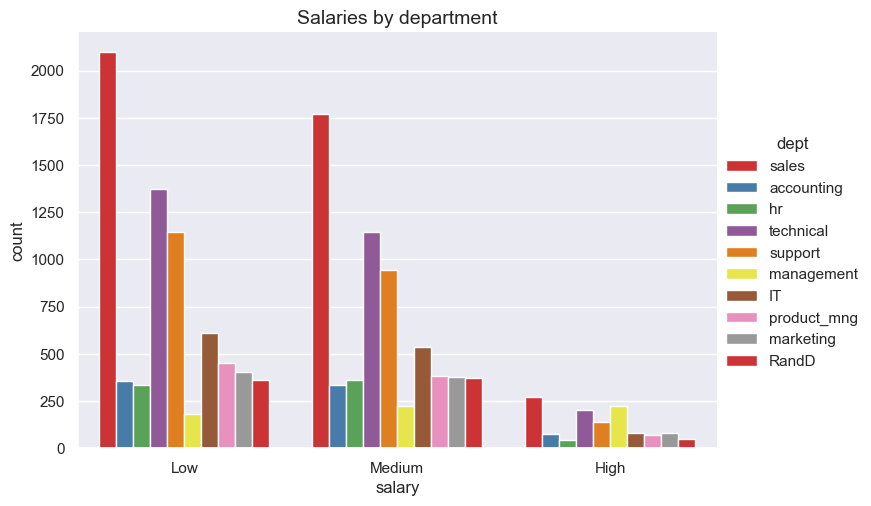

In [66]:
# Visualizing the relation between salary and employees leaving and departments

h = sns.catplot(x = 'salary', hue='dept', kind ='count',aspect=1.5, data=df, palette='Set1' )
plt.title("Salaries by department", fontsize=14)
h.set_xticklabels(['Low','Medium','High'])

Text(0.5, 1.0, 'Salary Comparison')

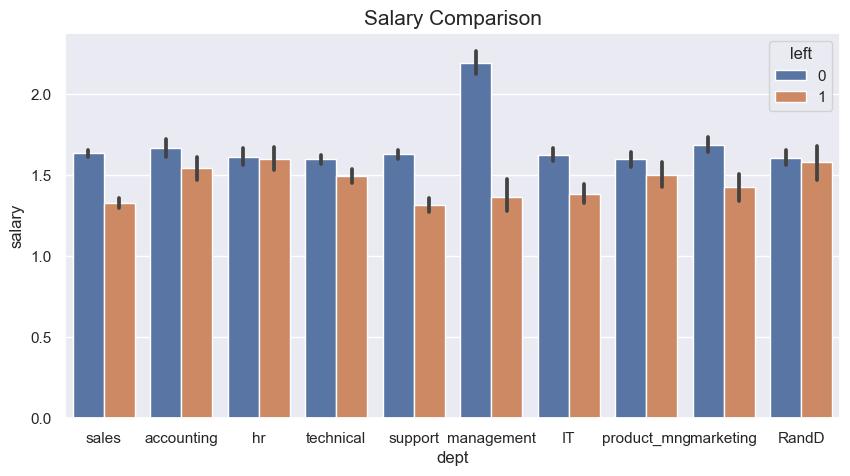

In [67]:
# Comparing salary difference of those who left against
# those who didn't

plt.figure(figsize=(10,5))
sns.barplot(x='dept', y='salary', hue='left', data=df)
plt.title('Salary Comparison', fontsize=15)

##### Conclusion

It seems that except for the managment department, there is little to no correlation between salary and leaving depicted by their correlation (-0.157).

##### Second Hypothesis

Is the company a good place to grow professionally?

Text(0.5, 1.0, 'Employees that have been promoted in the last five years')

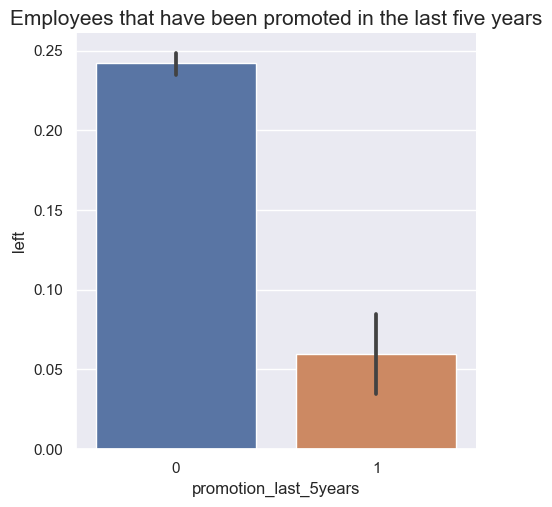

In [68]:
# Visualizing the relation between recent promotions and employees leaving

sns.catplot(x='promotion_last_5years', y='left', kind='bar', data=df)
plt.title('Employees that have been promoted in the last five years', fontsize=15)

In [69]:
# Some results

print("Employees that have been promoted in the last 5 years: ", df.promotion_last_5years.sum())
print("Employees that have been promoted in the last 5 years and left: " , df[df['left']==1].promotion_last_5years.sum())
print("Total Employees: ", df.shape[0])
p=(df.promotion_last_5years.sum()/df.shape[0])*100
print("% of employees promoted in the last 5 years:",(p),"%")

Employees that have been promoted in the last 5 years:  319
Employees that have been promoted in the last 5 years and left:  19
Total Employees:  14999
% of employees promoted in the last 5 years: 2.1268084538969263 %


We can clearly see how not promoting enough people might be making people discontented in the job.

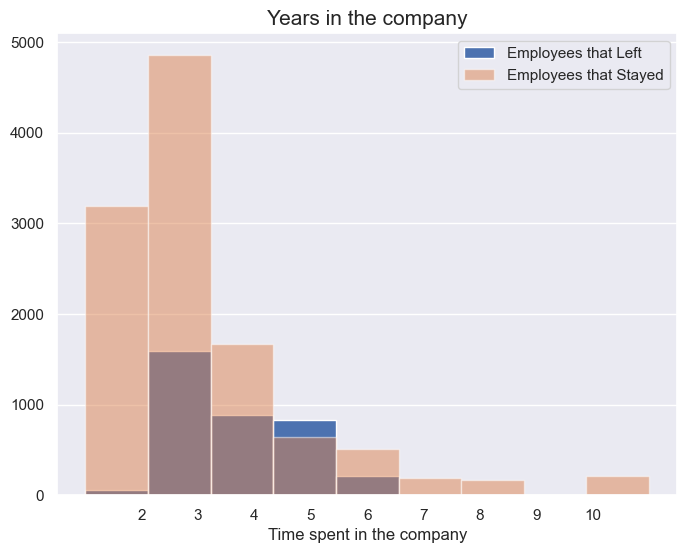

In [70]:
# Discussing time spent in the company

plt.figure(figsize=(8,6))
bins = np.linspace(1.0, 11, 10)
plt.hist(df[df['left']==1]['time_spend_company'], bins=bins, alpha=1, label='Employees that Left')
plt.hist(df[df['left']==0]['time_spend_company'], bins=bins, alpha=0.5, label='Employees that Stayed')
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.xlabel('Time spent in the company')
plt.title('Years in the company', fontsize=15)
plt.legend(loc='best')

##### Comments

- Employees with 7 or more years never leave, maybe because they are more comfortable and not so interested in look for a new challenge somewhere else.
- The problem starts when the employees have stayed for more than 3 years and gets worst around when they achieve 5 years.
- It is too early to say that the difficult to get promoted is the main reason for the leaving of the employees, but more research is needed.

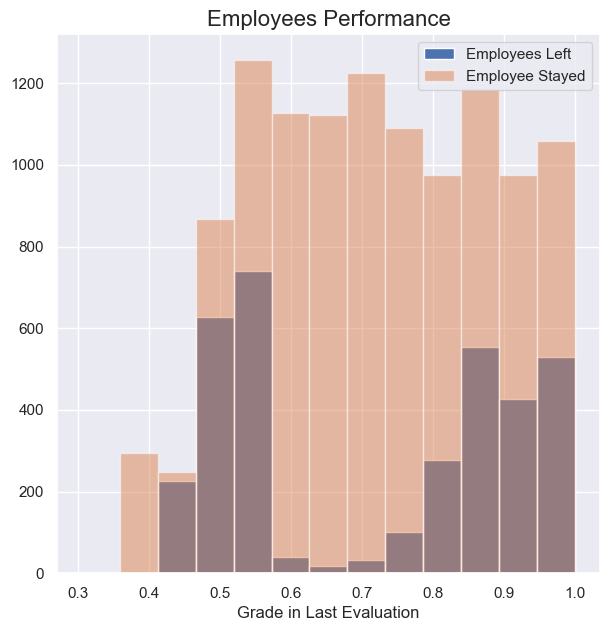

In [71]:
# Performance Analysis

plt.figure(figsize =(7,7))
bins = np.linspace(0.305, 1.0001, 14)
plt.hist(df[df['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['last_evaluation'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Performance', fontsize=16)
plt.xlabel('Grade in Last Evaluation')
plt.legend(loc='best')

##### Comments

There are 2 distinct groups of employees. 
 - A group with poor performance and other with high performance employees. 
 -  It's natural that employees that don't work well leave the company, but the main problem is that the high performance employees is leaving too and it's necessary to understand why.

In [72]:
# Performance Analysis with Project Count

poor_performance_left = df[(df.last_evaluation <= 0.62) & (df.number_project == 2) & (df.left == 1)]
print('People with poor performance and only 2 projects who left:',len(poor_performance_left))

poor_performance_stayed = df[(df.last_evaluation > 0.62) & (df.number_project == 2) & (df.left == 1)]
print('People with poor performance and only 2 projects who stayed:',len(poor_performance_stayed))

print('\n')

high_performance_left= df[(df.last_evaluation <= 0.62) & (df.number_project >=5) & (df.left == 1)]
high_performance_stayed= df[(df.last_evaluation > 0.8) & (df.number_project >=5) & (df.left == 0)]
print('People with high performance and more than 5 projects who left:',len(high_performance_left))
print('People with high performance and more than 5 projects who stayed:', len(high_performance_stayed))


People with poor performance and only 2 projects who left: 1531
People with poor performance and only 2 projects who stayed: 36


People with high performance and more than 5 projects who left: 47
People with high performance and more than 5 projects who stayed: 889


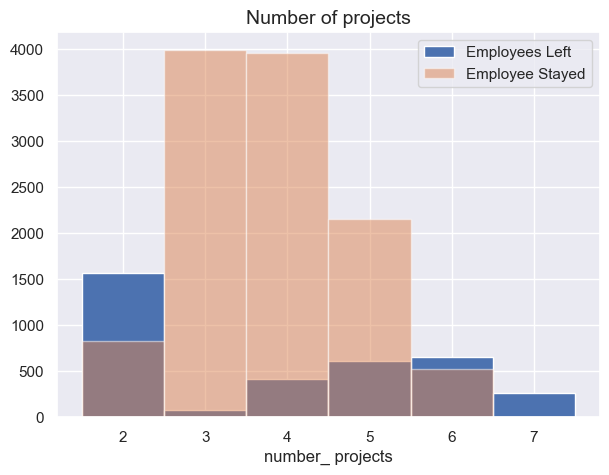

In [73]:
# Figure for the same

plt.figure(figsize =(7,5))
bins = np.linspace(1.5,7.5, 7)
plt.hist(df[df['left']==1]['number_project'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['number_project'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Number of projects', fontsize=14)
plt.xlabel('number_ projects')
plt.legend(loc='best');

##### Comments

- There seems to be a peak of employees leaving when they have done too many (>4) or too less (<=2) projects. This might be related to workload as well.
- There is also a correlation here with performance and last_evaluation.

##### Third Hypothesis

Now we will assume employees are leaving because it is a dangerous job.

Text(0.5, 1.0, 'Employess that had work accident')

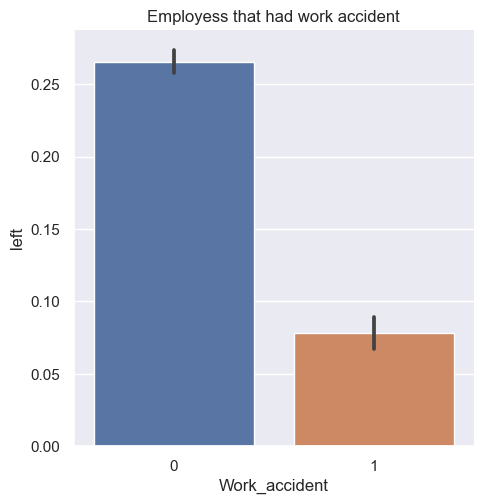

In [74]:
# Mapping the relation between work accidents and employees leaving

sns.catplot(x='Work_accident', y='left', kind='bar', data=df)
plt.title("Employess that had work accident")

In [75]:
# Counts of people who and those who had an accident and left

print("Employees that had an accident: ", df.Work_accident.sum())
print("Employees that left and had an accident: " , df[df['left']==1].Work_accident.sum())

Employees that had an accident:  2169
Employees that left and had an accident:  169


##### Conclusion

Clearly there is little to no correlation between accident s and leaving the work.

### Applying ML

Now we will finally apply the ML algorithms, with a twist in the clustering algorithms.

In [76]:
# Current state of data

df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2


##### For Classifiers

We will use the LogitBoost and GradientBoostingClassifier ML classifiers.

In [77]:
# Using One Hot Encoding on department type

dfoh=pd.get_dummies(df,columns=['dept'])

In [78]:
# Creating input and output datasets

y = dfoh['left']
X = dfoh.drop('left', axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0


In [79]:
# Output dataset

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [80]:
# Splitting our dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Applying the AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)
precision = precision_score(y_test, y_pred_ada, average='weighted')
recall = recall_score(y_test, y_pred_ada, average='weighted')
f1 = f1_score(y_test, y_pred_ada, average='weighted')
acc = adaboost.score(X_test, y_test)
print('AdaBoost Accuracy:', acc)
print('AdaBoost Precision:', precision)
print('AdaBoost Recall:', recall)
print('AdaBoost F1 Score:', f1)

AdaBoost Accuracy: 0.9153333333333333
AdaBoost Precision: 0.9155482685937971
AdaBoost Recall: 0.9153333333333333
AdaBoost F1 Score: 0.9111716127423208


In [82]:
# Applying the GBM CLassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
precision = precision_score(y_test, y_pred_gbm, average='weighted')
recall = recall_score(y_test, y_pred_gbm, average='weighted')
f1 = f1_score(y_test, y_pred_gbm, average='weighted')
acc = gbm.score(X_test, y_test)
print('GBM Accuracy:', acc)
print('GBM Precision:', precision)
print('GBM Recall:', recall)
print('GBM F1 Score:', f1)

GBM Accuracy: 0.9736666666666667
GBM Precision: 0.9735215042066708
GBM Recall: 0.9736666666666667
GBM F1 Score: 0.9735278801303381


Surprisingly, both classifiers have no false positives, thus giving an equal Recall and Accuracy.

##### For Clustering Algorithms

Here, we shall run our models on both the entire dataset and for specific attributes as well.

In [83]:
# DBSCAN Clustering for the entire dataset

X = dfoh
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Applying DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Analyzing the results
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 264


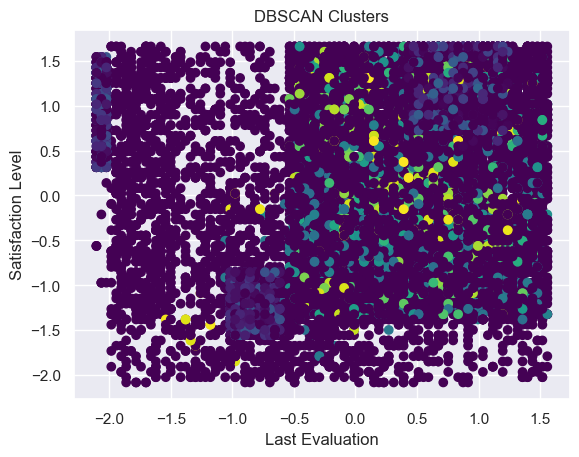

In [84]:
# Visualizing the DBSCAN Clustering

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clusters')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')
plt.show()

In [85]:
# Agglomerative Clustering for the entire dataset
X = dfoh 

# Apply agglomerative clustering
hierarchical = AGC(n_clusters=3)
labels = hierarchical.fit_predict(X)

In [86]:
type(X)

pandas.core.frame.DataFrame

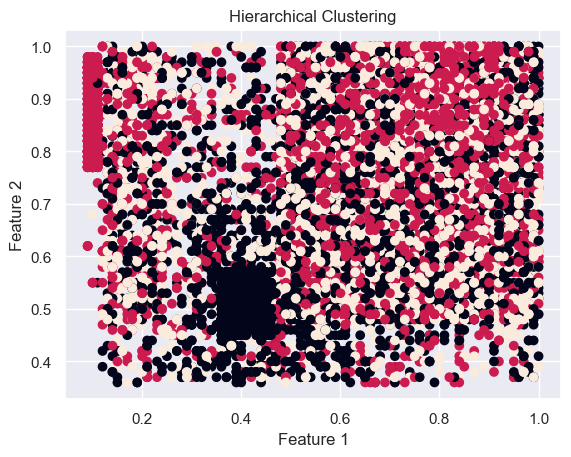

In [87]:
# Visualizing the agglomerative clustering

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

C:\Users\rishi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


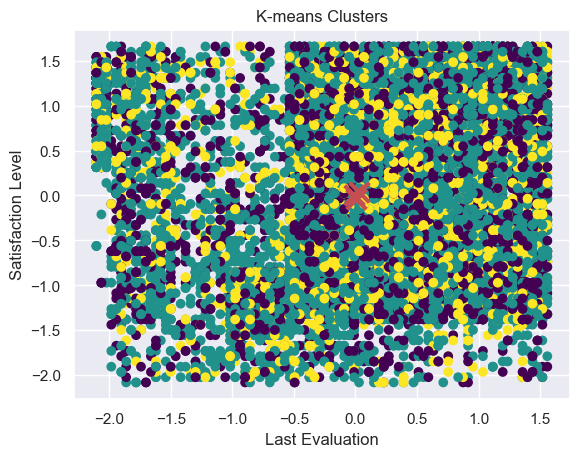

In [88]:
# Applying for K-means

X = dfoh
scaler = StandardScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Visualizing the K-means clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clusters')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')

# Adding the centroids to the plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()


We can clearly see how the current system does not create any good clusters and there is no real clustering. Now we will only extract the people who left and make the same clusters for the features we know are relevant.

In [89]:
# Preparing the dataset

X = dfoh
X = X[X['left']==1]
X = X[['satisfaction_level','last_evaluation']]
# X.drop(['left'], inplace = True)
X.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


C:\Users\rishi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


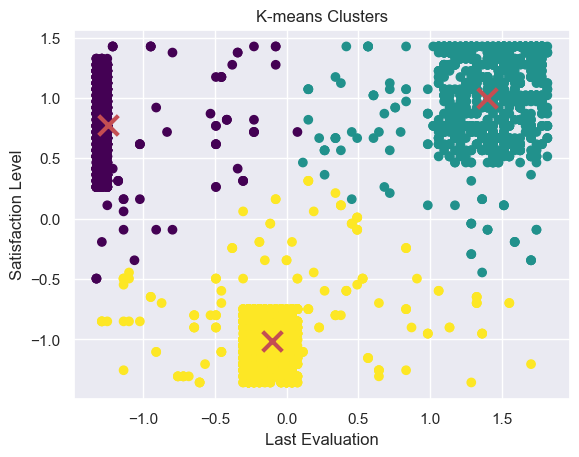

In [90]:
# For Kmeans with n = 3
scaler = StandardScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Visualizing the K-means clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clusters')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')

# Adding the centroids to the plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

C:\Users\rishi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


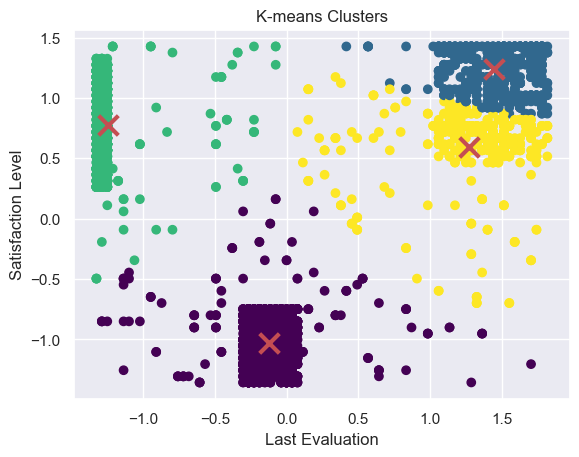

In [91]:
# For Kmeans with n = 4
scaler = StandardScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Visualizing the K-means clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clusters')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')

# Adding the centroids to the plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

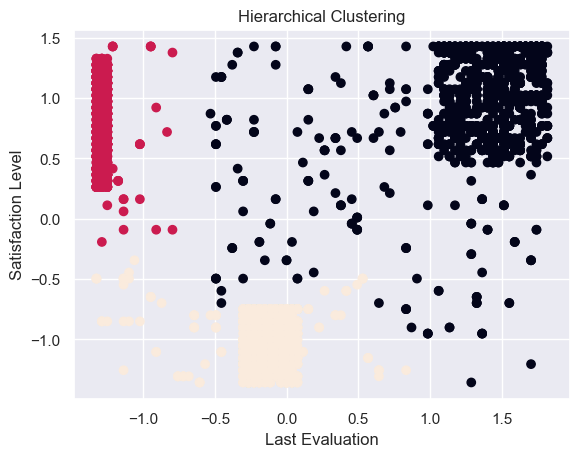

In [92]:
# Apply agglomerative clustering with n=3
hierarchical = AGC(n_clusters=3)
labels = hierarchical.fit_predict(X)

# Visualizing the agglomerative clustering
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('Hierarchical Clustering')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')
plt.show()

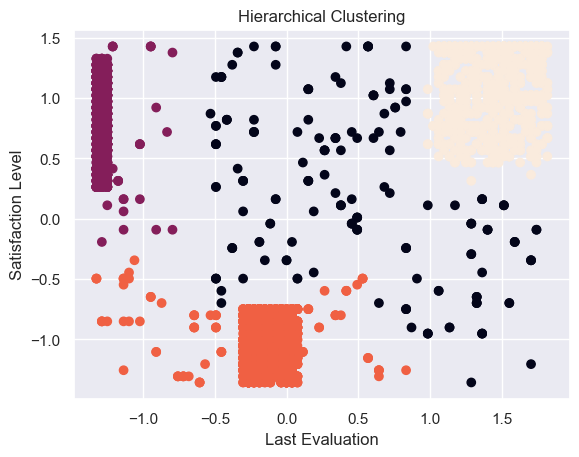

In [93]:
# Apply agglomerative clustering with n=4
hierarchical = AGC(n_clusters=4)
labels = hierarchical.fit_predict(X)

# Visualizing the agglomerative clustering
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('Hierarchical Clustering')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')
plt.show()

In [94]:
# Applying DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Analyzing the results
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 1


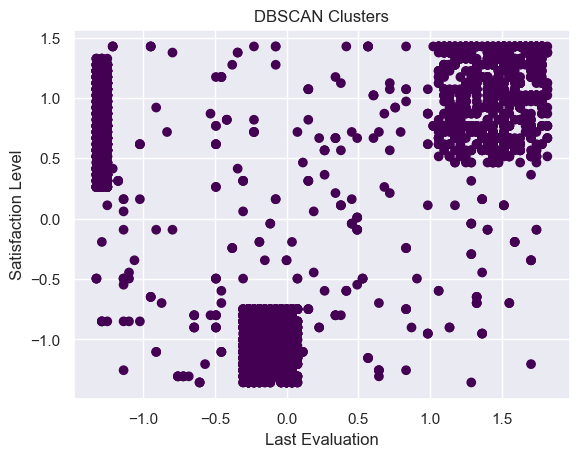

In [95]:
# Visualizing the DBSCAN Clustering
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clusters')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')
plt.show()

### Conclusion

- We can see how the K means and Agglomerative Clustering are really good at finding and dividing clusters.
- Both of them can identify three groups when n=3 condition is put which are distinct and are marching with the hypothesis we had put earlier.
- Agglomerative clustering is really accurate with how it judges and divides the employees who left and clusters them on the given fields.
- The GBM Classifier is the best classifier with 97% accuracy.
- We can further check how DL models can be applied on the same datasets.